<a href="https://colab.research.google.com/github/juancanete86/ColabTensor2/blob/master/Colab_4_Construir_una_Red_Neuronal_Convolucional_con_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Paso 1: Instalar las dependencias y la configuración del notebook en GPU

!pip install tensorflow-gpu==2.0.0.alpha0

## Paso 2: Importar las librerías necesarias

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.1.0'

## Paso 3: Pre procesado de datos


### Cargar el dataset  Cifar10

In [2]:
# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [3]:
# Cargar el dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Normalización de las imágenes

In [4]:
X_train = X_train / 255.0

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test = X_test / 255.0

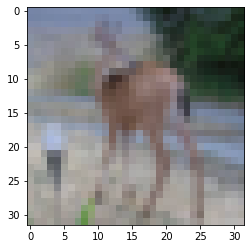

In [7]:
plt.imshow(X_test[100])

In [9]:
y_test[10]

array([0], dtype=uint8)

## Paso 4: Construir una red neuronal convolucional

### Definir el modelo

In [26]:
model = tf.keras.models.Sequential()

### Añadir la primera capa de convolución

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu
- input_shape: (32, 32, 3)


In [27]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Añadir una segunda capa convolucional y la capa de max-pooling 

Hyper parámetros de la capa de la RNC:
- Filtros: 32
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de MaxPool:
- pool_size: 2
- strides: 2
- padding: valid

In [28]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [29]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Añadir la tercera capa convolucional

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu


In [30]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Añadir la cuarta capa convolucional y la capa de max-pooling

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de la MaxPool:
- pool_size: 2
- strides: 2
- padding: valid


In [31]:
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))

In [32]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [33]:
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='valid', activation="relu"))

### Añadir la capa de flattening

In [34]:
model.add(tf.keras.layers.Flatten())

### Añadir la primera capa fully-connected

Hyper parámetros de la capa totalmente conectada:
- units/neurons: 128
- activation: relu

In [35]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [36]:
model.add(tf.keras.layers.Dropout(0.25))

### Añadir la capa de salida

Hyper parámetros de la capa totalmente conectada:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [37]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 256)        

### Compilar el modelo

#### sparse_categorical_accuracy
sparse_categorical_accuracy comprueba si el valor verdadero maximal coincide con el índice maximal del valor de la predicción.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.00015, name='Nadam')

In [39]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, name='Adam')

model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [40]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["sparse_categorical_accuracy"])

### Entrenar el modelo

In [41]:
model.fit(X_train, y_train, epochs=20)

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 231us/sample - loss: 1.5837 - sparse_categorical_accuracy: 0.4246
Epoch 2/20
50000/50000 [==============================] - 9s 182us/sample - loss: 1.1708 - sparse_categorical_accuracy: 0.5883
Epoch 3/20
50000/50000 [==============================] - 10s 197us/sample - loss: 0.9771 - sparse_categorical_accuracy: 0.6584
Epoch 4/20
50000/50000 [==============================] - 10s 197us/sample - loss: 0.8465 - sparse_categorical_accuracy: 0.7049
Epoch 5/20
50000/50000 [==============================] - 9s 186us/sample - loss: 0.7475 - sparse_categorical_accuracy: 0.7395
Epoch 6/20
50000/50000 [==============================] - 10s 199us/sample - loss: 0.6533 - sparse_categorical_accuracy: 0.7736
Epoch 7/20
50000/50000 [==============================] - 11s 212us/sample - loss: 0.5794 - sparse_categorical_accuracy: 0.7984
Epoch 8/20
50000/50000 [==============================] - 10s 194us/sample - loss: 

### Evaluar el modelo

In [42]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 101us/sample - loss: 1.0856 - sparse_categorical_accuracy: 0.7780


test_loss, test_accuracy = model.evaluate(X_test, y_test) # NADAM

In [0]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.753000020980835
